In [2]:
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
data=pd.read_csv(r'FINANCE_Credit_Scoring.csv')

In [4]:
data.isna().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [5]:
data.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
sizes=data['default'].value_counts().values.tolist()
labels=data['default'].value_counts().index.tolist()

Text(0.5, 1.0, 'Distribution of defaults')

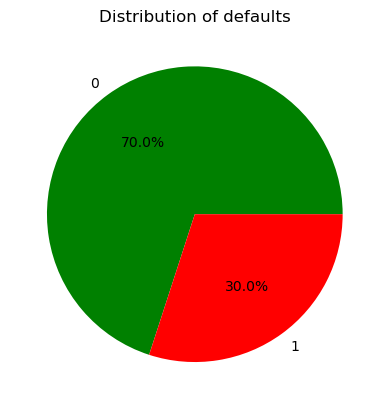

In [10]:
#Defaults red non defaults green and I will keep the logic consistent throughout the script
plt.pie(sizes, labels=labels,autopct='%1.1f%%',colors = ['green', 'red'])
plt.title('Distribution of defaults')


In [8]:
data.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [9]:
data['credit_history'].value_counts()

existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: credit_history, dtype: int64

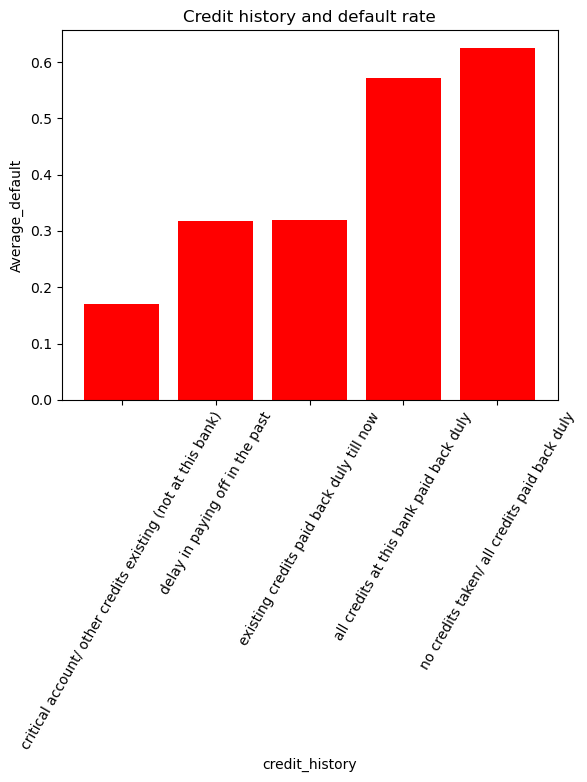

In [11]:
#Weird but the best credit history has the highest default rate
grouped=data.groupby(['credit_history'])['default'].mean().reset_index().sort_values(by=['default'])
plt.bar(grouped['credit_history'], grouped['default'],color='r')
plt.xticks(rotation=60)
plt.xlabel('credit_history')
plt.ylabel('Average_default')
plt.title('Credit history and default rate')
plt.show()

In [12]:
data['savings'].value_counts()

savings
... < 100 DM                   603
unknown/ no savings account    183
100 <= ... < 500 DM            103
500 <= ... < 1000 DM            63
.. >= 1000 DM                   48
Name: count, dtype: int64

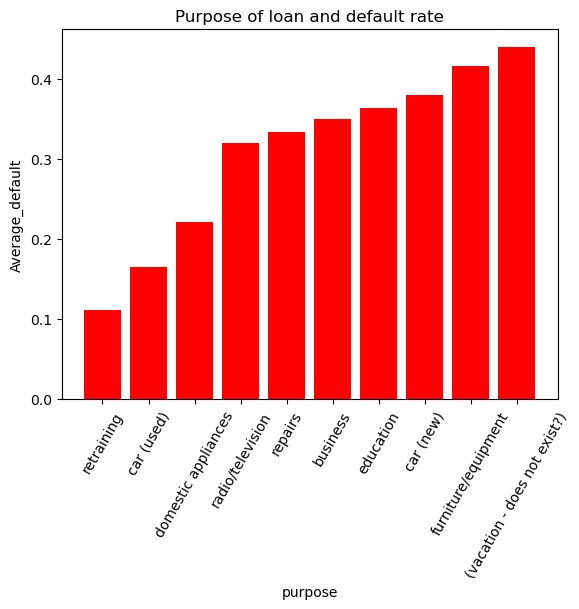

In [13]:
grouped=data.groupby(['purpose'])['default'].mean().reset_index().sort_values(by=['default'])
plt.bar(grouped['purpose'], grouped['default'],color='r')
plt.xticks(rotation=60)
plt.xlabel('purpose')
plt.ylabel('Average_default')
plt.title('Purpose of loan and default rate')
plt.show()

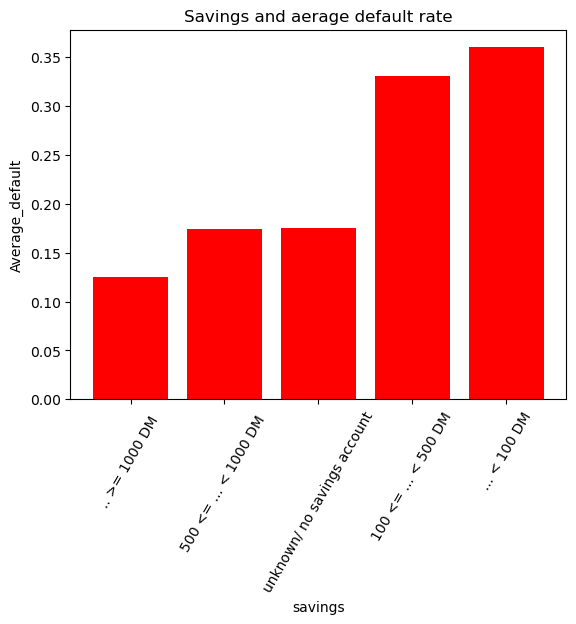

In [14]:

#Small saving higher default
grouped=data.groupby(['savings'])['default'].mean().reset_index().sort_values(by=['default'])
plt.bar(grouped['savings'], grouped['default'],color='r')
plt.xticks(rotation=60)
plt.xlabel('savings')
plt.ylabel('Average_default')
plt.title('Savings and aerage default rate')
plt.show()

3938.1266666666666


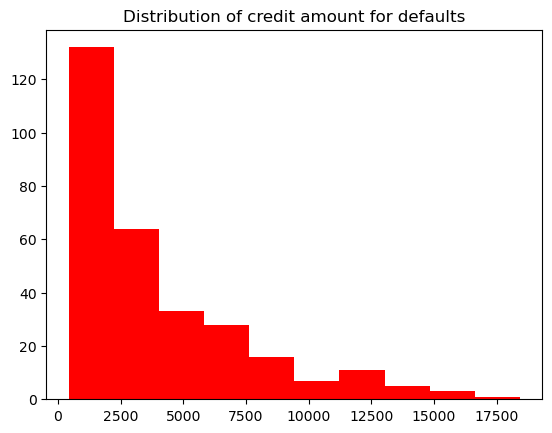

In [15]:
#Distribution of credit amount for defaulted cases
plt.hist(data[data['default']==1]['credit_amount'],color='r')
plt.title('Distribution of credit amount for defaults')
print((data[data['default']==1]['credit_amount']).mean())

2985.457142857143


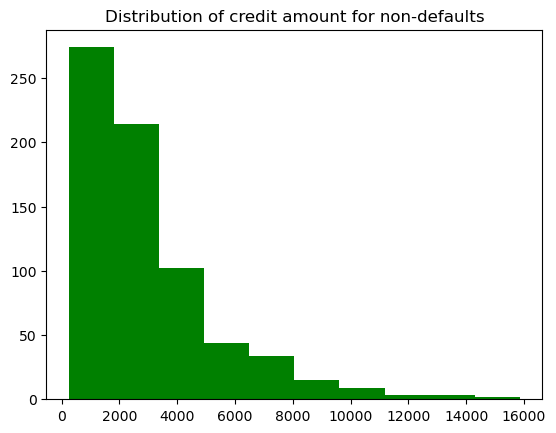

In [16]:
#Distribution of credit amount for non-defaulted cases
plt.hist(data[data['default']==0]['credit_amount'],color='g')
plt.title('Distribution of credit amount for non-defaults')
print((data[data['default']==0]['credit_amount']).mean())

In [17]:
data['personal_status_sex']

0                            male : single
1      female : divorced/separated/married
2                            male : single
3                            male : single
4                            male : single
                      ...                 
995    female : divorced/separated/married
996              male : divorced/separated
997                          male : single
998                          male : single
999                          male : single
Name: personal_status_sex, Length: 1000, dtype: object

In [18]:
data[['Gender', 'Marital_status']] = data['personal_status_sex'].str.split(':', expand=True)


Text(0.5, 1.0, 'Distribution of Gender')

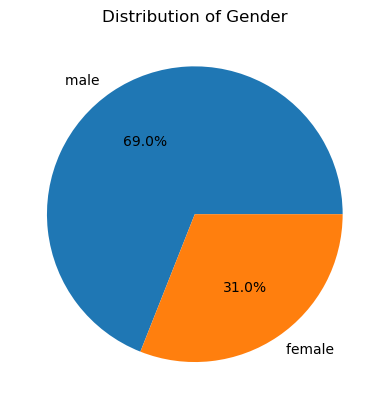

In [19]:
#Neutral colors
sizes=data['Gender'].value_counts().values.tolist()
labels=data['Gender'].value_counts().index.tolist()
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title('Distribution of Gender')

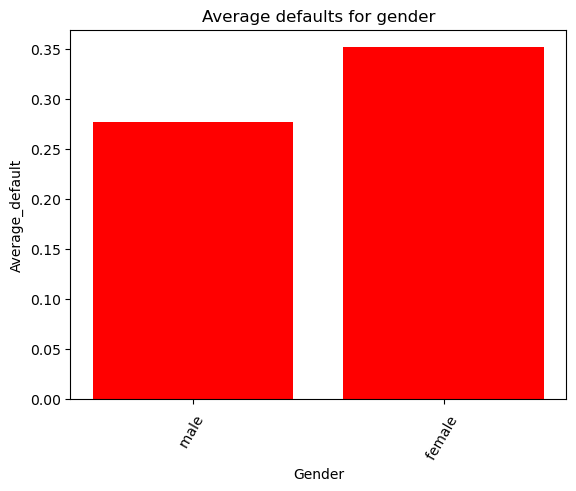

In [22]:
grouped=data.groupby(['Gender'])['default'].mean().reset_index().sort_values(by=['default'])
plt.bar(grouped['Gender'], grouped['default'],color='r')
plt.xticks(rotation=60)
plt.xlabel('Gender')
plt.ylabel('Average_default')
plt.title('Average defaults for gender')
plt.show()

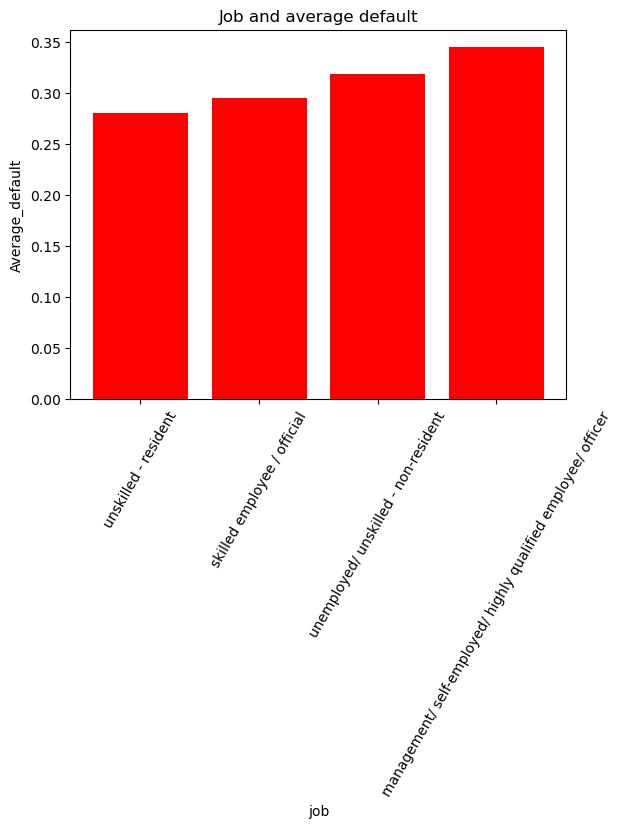

In [31]:
#Default rate is depicted using red
grouped=data.groupby(['job'])['default'].mean().reset_index().sort_values(by=['default'])
plt.bar(grouped['job'], grouped['default'],color='r')
plt.xticks(rotation=60)
plt.xlabel('job')
plt.ylabel('Average_default')
plt.title('Job and average default')
plt.show()